In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Oil and Gas Exploration and Production in the State of Kentucky Shown as Quarter-Mile Cells
Citation: Biewick, L.R., 2008, Oil and Gas Exploration and Production in the State of Kentucky Shown as Quarter-Mile Cells: U.S. Geological Survey data release,   
**https://doi.org/10.5066/P13NZURP.**  
Summary: A cells polygon feature class was created by the U.S. Geological Survey (USGS) to illustrate the degree of exploration, type of production, and distribution of production in the State of Kentucky. Each cell represents a quarter-mile square of the land surface, and the cells are coded to represent whether the wells included within the cell are predominantly oil-producing, gas-producing, both oil and gas-producing, or the type of production of the wells located within the cell is unknown or dry. Data were retrieved from the Kentucky Oil and Gas Well Records database and saved as a shapefile of oil and gas well locations for Kentucky. Cells were developed as a graphic solution to overcome the problem of displaying proprietary well data. No proprietary data are displayed or included in the cell maps. The data are current as of 2005.

In [2]:
shapefile_path = "kycells05g/kycells05g.shp"
gdf_oilgas = gpd.read_file(shapefile_path)
print(gdf_oilgas.head())

   CC83XCOORD  CC83YCOORD  CELLSYMB  \
0  -87.612162   37.456436         4   
1  -82.175694   37.456213         2   
2  -84.759818   37.456264         1   
3  -87.105100   37.456329         4   
4  -87.713574   37.456204         4   

                                            geometry  
0  POLYGON ((-87.61633 37.46033, -87.60718 37.459...  
1  POLYGON ((-82.17957 37.46028, -82.17049 37.459...  
2  POLYGON ((-84.76492 37.45312, -84.76384 37.460...  
3  POLYGON ((-87.10924 37.46024, -87.1001 37.4595...  
4  POLYGON ((-87.71775 37.46009, -87.7086 37.4594...  


In [3]:
print("\n--- Shapefile Metadata ---")
print(gdf_oilgas.info())
print("\n--- Coordinate Reference System (CRS) ---")
print(gdf_oilgas.crs)
print("\n--- Column Names ---")
print(gdf_oilgas.columns)
print("\n--- Geometry Type ---")
print(gdf_oilgas.geom_type.value_counts())
print(f"\nTotal Number of Features: {len(gdf_oilgas)}")


--- Shapefile Metadata ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32478 entries, 0 to 32477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CC83XCOORD  32478 non-null  float64 
 1   CC83YCOORD  32478 non-null  float64 
 2   CELLSYMB    32478 non-null  int64   
 3   geometry    32478 non-null  geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 1015.1 KB
None

--- Coordinate Reference System (CRS) ---
GEOGCS["DD_NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

--- Column Names ---
Index(['CC83XCOORD', 'CC83YCOORD', 'CELLSYMB', 'geometry'], dtype='object')

--- Geometry Type ---
Polygon    32478
Name: count, dtype: int64

Total Number of Features: 32478


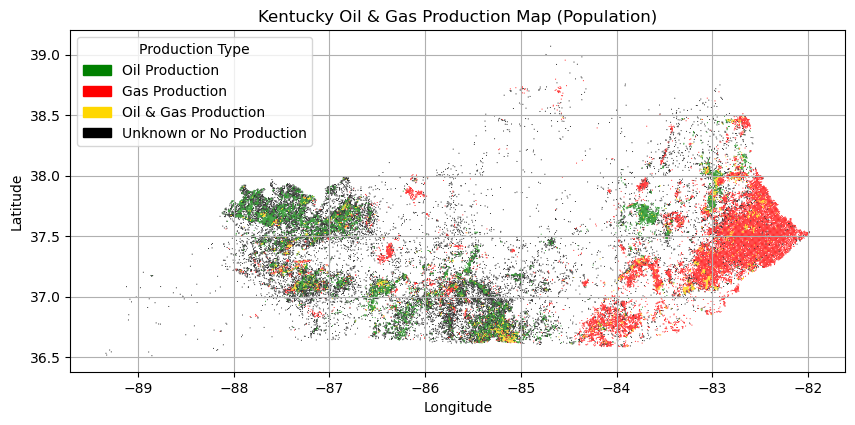

In [4]:
# Define production types and corresponding colors
production_labels = {
    1: "Oil Production",
    2: "Gas Production",
    3: "Oil & Gas Production",
    4: "Unknown or No Production"
}

production_colors = {
    1: "green",
    2: "red",
    3: "gold",
    4: "black"
}

# Plot the oil and gas production map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each category separately
for prod_type, color in production_colors.items():
    subset = gdf_oilgas[gdf_oilgas["CELLSYMB"] == prod_type]
    subset.plot(ax=ax, color=color, label=production_labels[prod_type])

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(production_labels.values(), production_colors.values())]
ax.legend(handles=legend_patches, loc="upper left", title="Production Type")

# Add titles and labels
ax.set_title("Kentucky Oil & Gas Production Map (Population)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()

In [5]:
hydroshed_path = "/Users/jmframe/data/basinatlas/BasinATLAS_v10_lev08.shp"
gdf_hydroshed = gpd.read_file(hydroshed_path)

/var/folders/08/fcnqv5n16bd3p26sxm806b080000gp/T/ipykernel_89923/1382114868.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  gdf_hydroshed_clipped = gpd.clip(gdf_hydroshed, ky_boundary)
/Users/jmframe/miniconda3/envs/geostats_env/lib/python3.10/site-packages/pyogrio/raw.py:723: RuntimeWarning: Creating a 256th field, but some DBF readers might only support 255 fields
  ogr_write(


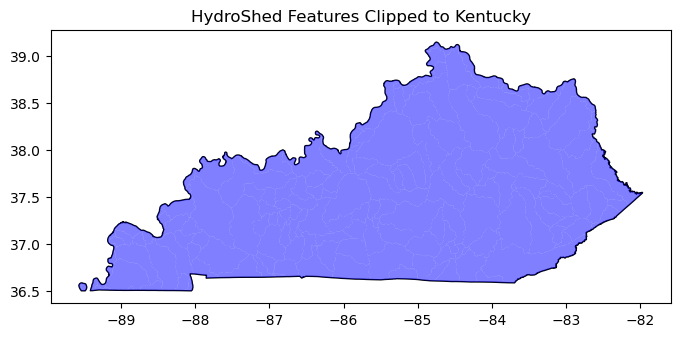

In [6]:
shapefile_path_ky_counties = "tl_2016_21_cousub/tl_2016_21_cousub.shp"
gdf_ky_counties = gpd.read_file(shapefile_path_ky_counties)
# Dissolve Kentucky counties into a single boundary polygon
ky_boundary = gdf_ky_counties.dissolve(by="STATEFP")

# Clip HydroShed data to Kentucky boundary
gdf_hydroshed_clipped = gpd.clip(gdf_hydroshed, ky_boundary)

# Save clipped shapefile (optional)
output_path = "/Users/jmframe/data/hydroshed_clipped_to_KY.shp"
gdf_hydroshed_clipped.to_file(output_path)

# Plot to check the result
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ky_boundary.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
gdf_hydroshed_clipped.plot(ax=ax, color="blue", alpha=0.5)
plt.title("HydroShed Features Clipped to Kentucky")
plt.show()

In [7]:
gdf_hydroshed_clipped.columns.tolist()

['HYBAS_ID',
 'NEXT_DOWN',
 'NEXT_SINK',
 'MAIN_BAS',
 'DIST_SINK',
 'DIST_MAIN',
 'SUB_AREA',
 'UP_AREA',
 'PFAF_ID',
 'ENDO',
 'COAST',
 'ORDER_',
 'SORT',
 'dis_m3_pyr',
 'dis_m3_pmn',
 'dis_m3_pmx',
 'run_mm_syr',
 'inu_pc_smn',
 'inu_pc_umn',
 'inu_pc_smx',
 'inu_pc_umx',
 'inu_pc_slt',
 'inu_pc_ult',
 'lka_pc_sse',
 'lka_pc_use',
 'lkv_mc_usu',
 'rev_mc_usu',
 'dor_pc_pva',
 'ria_ha_ssu',
 'ria_ha_usu',
 'riv_tc_ssu',
 'riv_tc_usu',
 'gwt_cm_sav',
 'ele_mt_sav',
 'ele_mt_uav',
 'ele_mt_smn',
 'ele_mt_smx',
 'slp_dg_sav',
 'slp_dg_uav',
 'sgr_dk_sav',
 'clz_cl_smj',
 'cls_cl_smj',
 'tmp_dc_syr',
 'tmp_dc_uyr',
 'tmp_dc_smn',
 'tmp_dc_smx',
 'tmp_dc_s01',
 'tmp_dc_s02',
 'tmp_dc_s03',
 'tmp_dc_s04',
 'tmp_dc_s05',
 'tmp_dc_s06',
 'tmp_dc_s07',
 'tmp_dc_s08',
 'tmp_dc_s09',
 'tmp_dc_s10',
 'tmp_dc_s11',
 'tmp_dc_s12',
 'pre_mm_syr',
 'pre_mm_uyr',
 'pre_mm_s01',
 'pre_mm_s02',
 'pre_mm_s03',
 'pre_mm_s04',
 'pre_mm_s05',
 'pre_mm_s06',
 'pre_mm_s07',
 'pre_mm_s08',
 'pre_mm_s09',
 '

In [8]:
# Ensure both GeoDataFrames have the same CRS
gdf = gdf_oilgas.to_crs(gdf_hydroshed_clipped.crs)

# Separate oil and gas wells
gdf_oil = gdf[gdf['CELLSYMB'].isin([1, 3])]  # 1 = Oil, 3 = Both
gdf_gas = gdf[gdf['CELLSYMB'].isin([2, 3])]  # 2 = Gas, 3 = Both

# Spatial join to assign wells to counties
oil_per_basin = gpd.sjoin(gdf_oil, gdf_hydroshed_clipped, how="inner", predicate="within")
gas_per_basin = gpd.sjoin(gdf_gas, gdf_hydroshed_clipped, how="inner", predicate="within")

# Count wells per county
oil_counts = oil_per_basin.groupby("HYBAS_ID").size().reset_index(name="oil_wells")
gas_counts = gas_per_basin.groupby("HYBAS_ID").size().reset_index(name="gas_wells")

# Merge counts into counties GeoDataFrame
gdf_hydroshed_clipped = gdf_hydroshed_clipped.merge(oil_counts, on="HYBAS_ID", how="left").fillna(0)
gdf_hydroshed_clipped = gdf_hydroshed_clipped.merge(gas_counts, on="HYBAS_ID", how="left").fillna(0)

# Compute well density (wells per square km)
gdf_hydroshed_clipped["oil_density"] = gdf_hydroshed_clipped["oil_wells"] / gdf_hydroshed_clipped["geometry"].area
gdf_hydroshed_clipped["gas_density"] = gdf_hydroshed_clipped["gas_wells"] / gdf_hydroshed_clipped["geometry"].area

# Convert to wells per 1000 sq km for better readability
gdf_hydroshed_clipped["oil_density"] *= 1e6
gdf_hydroshed_clipped["gas_density"] *= 1e6

/var/folders/08/fcnqv5n16bd3p26sxm806b080000gp/T/ipykernel_89923/1997651645.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_hydroshed_clipped["oil_density"] = gdf_hydroshed_clipped["oil_wells"] / gdf_hydroshed_clipped["geometry"].area
/var/folders/08/fcnqv5n16bd3p26sxm806b080000gp/T/ipykernel_89923/1997651645.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_hydroshed_clipped["gas_density"] = gdf_hydroshed_clipped["gas_wells"] / gdf_hydroshed_clipped["geometry"].area


In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

R² for Oil Density Prediction: 1.000
R² for Gas Density Prediction: 0.984


/Users/jmframe/miniconda3/envs/geostats_env/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/jmframe/miniconda3/envs/geostats_env/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


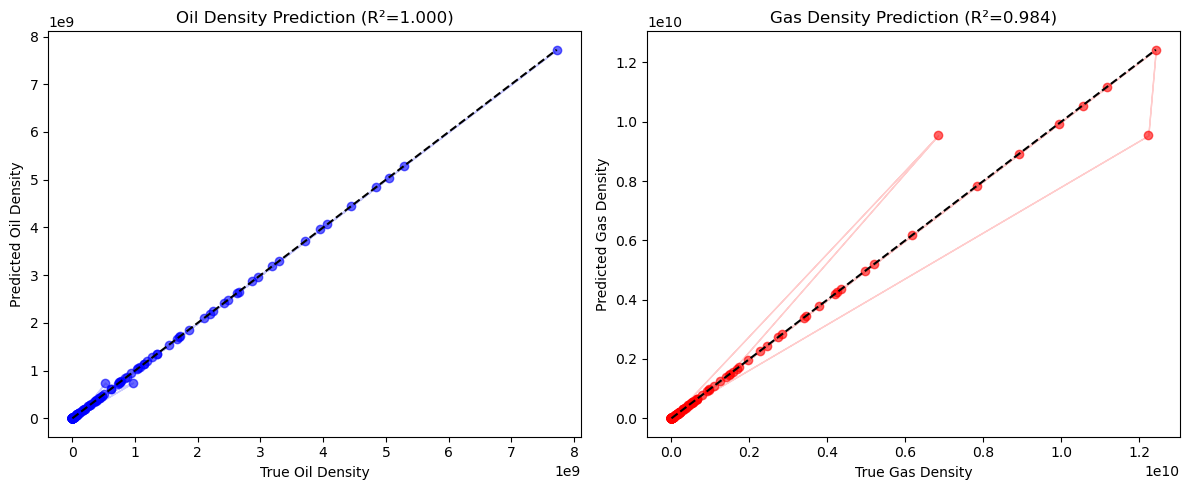

In [10]:

# Select features and target variables
features = [
    'ele_mt_smx', 'cly_pc_sav', 'slt_pc_sav', 'snd_pc_sav', 
]
target_oil = 'oil_density'
target_gas = 'gas_density'

# Drop NaNs in selected columns
gdf_clean = gdf_hydroshed_clipped.dropna(subset=features + [target_oil, target_gas])

# Extract feature matrix and target vectors
X = gdf_clean[features].values
y_oil = gdf_clean[target_oil].values
y_gas = gdf_clean[target_gas].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a kernel with an RBF component
kernel = C(1.0) * RBF(length_scale=1.0)

# Train Gaussian Process models for oil and gas density on the entire dataset
gp_oil = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=10)
gp_gas = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=10)

gp_oil.fit(X_scaled, y_oil)
gp_gas.fit(X_scaled, y_gas)

# Predict on the same dataset
y_oil_pred, y_oil_std = gp_oil.predict(X_scaled, return_std=True)
y_gas_pred, y_gas_std = gp_gas.predict(X_scaled, return_std=True)

# Compute R² for the entire dataset
r2_oil = gp_oil.score(X_scaled, y_oil)
r2_gas = gp_gas.score(X_scaled, y_gas)

print(f"R² for Oil Density Prediction: {r2_oil:.3f}")
print(f"R² for Gas Density Prediction: {r2_gas:.3f}")

# Plot Predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Oil Density Predictions
axes[0].scatter(y_oil, y_oil_pred, color="blue", alpha=0.6)
axes[0].plot([min(y_oil), max(y_oil)], [min(y_oil), max(y_oil)], "k--")
axes[0].fill_between(y_oil, y_oil_pred - 2 * y_oil_std, y_oil_pred + 2 * y_oil_std, color="blue", alpha=0.2)
axes[0].set_xlabel("True Oil Density")
axes[0].set_ylabel("Predicted Oil Density")
axes[0].set_title(f"Oil Density Prediction (R²={r2_oil:.3f})")

# Gas Density Predictions
axes[1].scatter(y_gas, y_gas_pred, color="red", alpha=0.6)
axes[1].plot([min(y_gas), max(y_gas)], [min(y_gas), max(y_gas)], "k--")
axes[1].fill_between(y_gas, y_gas_pred - 2 * y_gas_std, y_gas_pred + 2 * y_gas_std, color="red", alpha=0.2)
axes[1].set_xlabel("True Gas Density")
axes[1].set_ylabel("Predicted Gas Density")
axes[1].set_title(f"Gas Density Prediction (R²={r2_gas:.3f})")

plt.tight_layout()
plt.show()

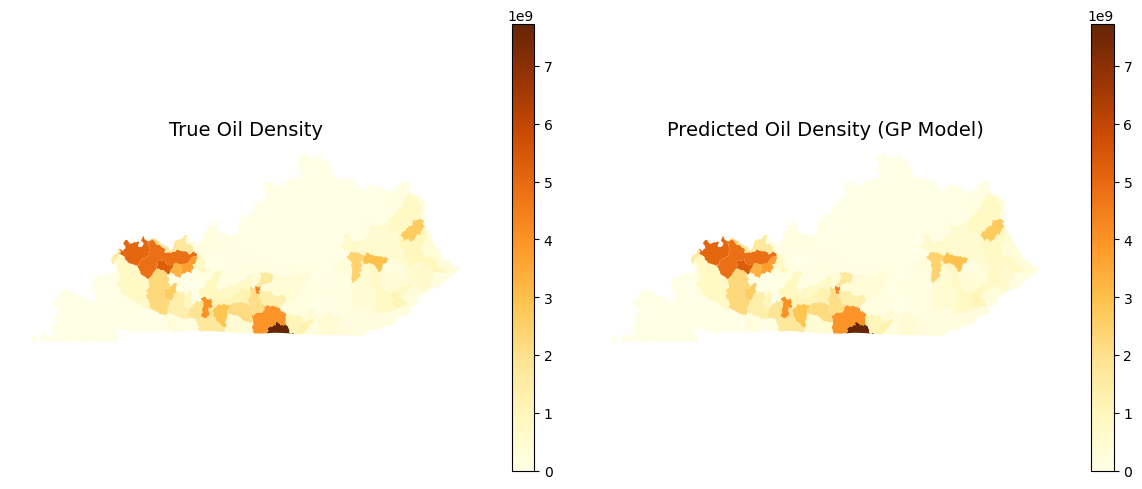

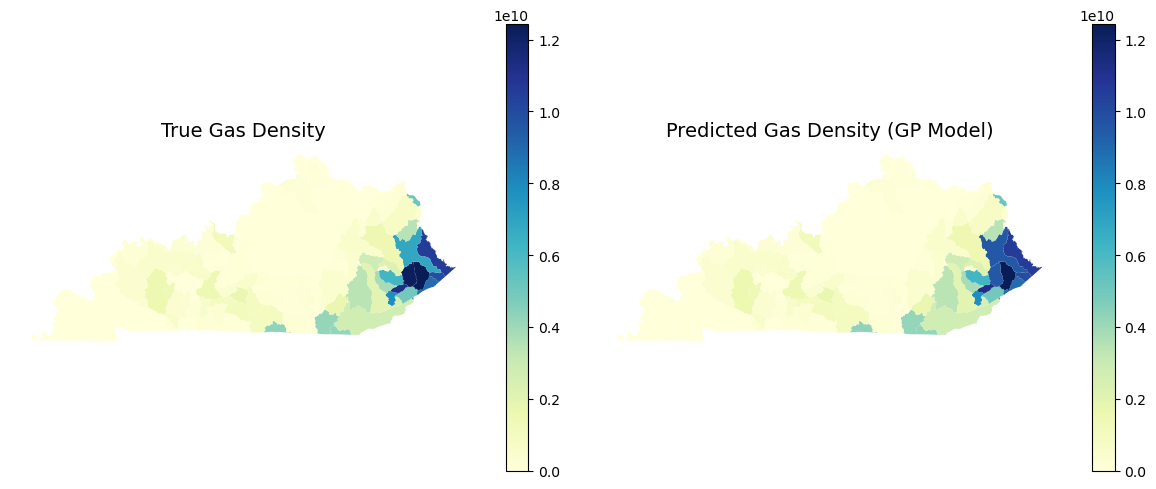

In [11]:
# Add GP predictions to the GeoDataFrame
gdf_hydroshed_clipped["oil_pred"] = y_oil_pred
gdf_hydroshed_clipped["gas_pred"] = y_gas_pred

# Define a function to plot maps side by side
def plot_maps_side_by_side(gdf, col_true, col_pred, title_true, title_pred, cmap="viridis"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Determine shared color scale
    vmin = min(gdf[col_true].min(), gdf[col_pred].min())
    vmax = max(gdf[col_true].max(), gdf[col_pred].max())

    # True values plot
    gdf.plot(column=col_true, cmap=cmap, legend=True, vmin=vmin, vmax=vmax, ax=axes[0])
    axes[0].set_title(title_true, fontsize=14)
    axes[0].set_axis_off()

    # Predicted values plot
    gdf.plot(column=col_pred, cmap=cmap, legend=True, vmin=vmin, vmax=vmax, ax=axes[1])
    axes[1].set_title(title_pred, fontsize=14)
    axes[1].set_axis_off()

    plt.tight_layout()
    plt.show()

# Plot True vs Predicted Oil Density
plot_maps_side_by_side(
    gdf_hydroshed_clipped, 
    "oil_density", "oil_pred", 
    "True Oil Density", "Predicted Oil Density (GP Model)", 
    cmap="YlOrBr"
)

# Plot True vs Predicted Gas Density
plot_maps_side_by_side(
    gdf_hydroshed_clipped, 
    "gas_density", "gas_pred", 
    "True Gas Density", "Predicted Gas Density (GP Model)", 
    cmap="YlGnBu"
)

R² for Oil Density Prediction: -0.250
R² for Gas Density Prediction: -0.065


/Users/jmframe/miniconda3/envs/geostats_env/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/jmframe/miniconda3/envs/geostats_env/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


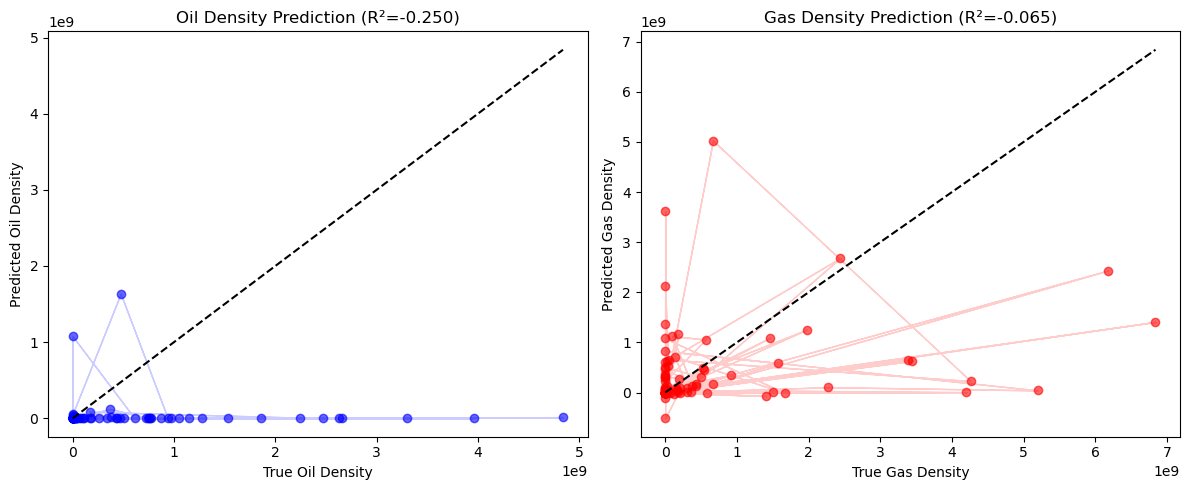

In [12]:
# Select features and target variables
features = [
    'ele_mt_smx', 'slp_dg_sav', 'UP_AREA', 'cly_pc_sav', 'cly_pc_uav', 
    'slt_pc_sav', 'slt_pc_uav', 'snd_pc_sav', 'snd_pc_uav'
]
target_oil = 'oil_density'
target_gas = 'gas_density'

# Drop NaNs in selected columns
gdf_clean = gdf_hydroshed_clipped.dropna(subset=features + [target_oil, target_gas])

# Extract feature matrix and target vectors
X = gdf_clean[features].values
y_oil = gdf_clean[target_oil].values
y_gas = gdf_clean[target_gas].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_oil_train, y_oil_test = train_test_split(X_scaled, y_oil, test_size=0.5, random_state=42)
X_train, X_test, y_gas_train, y_gas_test = train_test_split(X_scaled, y_gas, test_size=0.5, random_state=42)

# Define a kernel with an RBF component
kernel = C(10.0) * RBF(length_scale=1.0)

# Train Gaussian Process models for oil and gas density
gp_oil = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=10)
gp_gas = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=10)

gp_oil.fit(X_train, y_oil_train)
gp_gas.fit(X_train, y_gas_train)

# Predict on the test set
y_oil_pred, y_oil_std = gp_oil.predict(X_test, return_std=True)
y_gas_pred, y_gas_std = gp_gas.predict(X_test, return_std=True)

# Evaluate model performance (R^2 score)
r2_oil = gp_oil.score(X_test, y_oil_test)
r2_gas = gp_gas.score(X_test, y_gas_test)

print(f"R² for Oil Density Prediction: {r2_oil:.3f}")
print(f"R² for Gas Density Prediction: {r2_gas:.3f}")

# Plot Predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Oil Density Predictions
axes[0].scatter(y_oil_test, y_oil_pred, color="blue", alpha=0.6)
axes[0].plot([min(y_oil_test), max(y_oil_test)], [min(y_oil_test), max(y_oil_test)], "k--")
axes[0].fill_between(y_oil_test, y_oil_pred - 2 * y_oil_std, y_oil_pred + 2 * y_oil_std, color="blue", alpha=0.2)
axes[0].set_xlabel("True Oil Density")
axes[0].set_ylabel("Predicted Oil Density")
axes[0].set_title(f"Oil Density Prediction (R²={r2_oil:.3f})")

# Gas Density Predictions
axes[1].scatter(y_gas_test, y_gas_pred, color="red", alpha=0.6)
axes[1].plot([min(y_gas_test), max(y_gas_test)], [min(y_gas_test), max(y_gas_test)], "k--")
axes[1].fill_between(y_gas_test, y_gas_pred - 2 * y_gas_std, y_gas_pred + 2 * y_gas_std, color="red", alpha=0.2)
axes[1].set_xlabel("True Gas Density")
axes[1].set_ylabel("Predicted Gas Density")
axes[1].set_title(f"Gas Density Prediction (R²={r2_gas:.3f})")

plt.tight_layout()
plt.show()